## Classifying Abnormal ECGs: Classification Neural Network Model

This project uses the ECG5000 dataset. The model uses the data to train a model to detect anomalies on the scans. The dependent variable is a binary variable where 1 indicates a normal scan, and 0 indicates an anomaly. 

#### Introduction: Packages and Data

In [2]:
# create an arrey to use to set names to the columns
names=[]
for i in range(140): #total variables
    names.append(i)
names.append('Target') #the dependent variable


In [1]:
#import necessary modules

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

#I will also set the seeds of different random number generators to make sure who get the same results every time
tf.random.set_seed(42)

#no warnings for chained assignments. I know, I know, but okay

pd.options.mode.chained_assignment= None

In [3]:
#import data
df = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv", names = names)

##### Explore Data

In [4]:
df.shape

(4998, 141)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,Target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


##### Data Preprocessing

In [6]:
#this data has only numerical values. Let's store this into a variable
numerics = names
#remove the dependent variable
numerics.remove('Target')

In [7]:
#check out the frequency in dependent variable
df.Target.value_counts(normalize = True)

Target
1.0    0.584034
0.0    0.415966
Name: proportion, dtype: float64

In [8]:
#extract the dependent variable
y = df.pop("Target")

In [9]:
#let's split the data into trian and test
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, stratify = y)

In [12]:
#calculate mean and sd of the training set to use in normalization
means = x_train[numerics].mean()
sd = x_train[numerics].std()
print(means, sd)

0     -0.260572
1     -1.649211
2     -2.491260
3     -3.121031
4     -3.166600
         ...   
135   -0.762097
136   -0.840353
137   -0.649493
138   -0.491006
139   -0.714143
Length: 140, dtype: float64 0      1.155185
1      1.450316
2      1.383637
3      1.299958
4      1.100034
         ...   
135    2.085562
136    2.058611
137    1.864145
138    1.843986
139    1.420016
Length: 140, dtype: float64


In [13]:
#normalize train and test data
x_train[numerics]= (x_train[numerics]-means)/sd
x_test[numerics] = (x_test[numerics]- means)/sd

In [14]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
979,1.373649,1.506701,0.451705,0.099906,-0.975350,-1.797949,-0.932111,-0.223318,-0.190879,0.379472,...,-1.060975,-0.611937,0.057910,0.373953,0.394787,0.735334,0.626456,0.287720,-0.314996,-0.012436
904,-0.790907,-0.860370,-0.591975,-0.724377,-0.961030,-0.840349,-0.321905,0.075100,-0.212495,0.009022,...,1.277287,1.109349,0.787323,0.428436,0.030654,-0.143496,-0.223377,-0.333752,-0.105748,-0.439091
638,1.174188,1.316739,1.014117,0.854376,0.033581,-0.835947,-1.090973,-0.767115,-0.882077,-0.867415,...,-0.117870,0.112402,0.562662,0.724825,0.643958,0.862708,0.821031,0.641297,0.267901,0.736437
397,0.411986,0.411685,0.260325,0.379317,0.393859,0.050228,-0.737198,-1.372282,-1.018703,-0.778479,...,0.149207,-0.063368,-0.369787,-0.540734,-0.822634,-1.135070,-1.550544,-1.578444,-1.327398,-0.592599
2885,1.443529,1.722608,1.260171,0.799672,-0.012034,-0.984821,-1.274751,-0.584974,-0.627524,-0.992454,...,-0.024504,0.119095,0.491418,0.736294,0.774439,1.060915,1.155874,1.314065,1.020131,1.358874


In [15]:
#convert both panda dataframes to numpy arrays to use for Keras and Tensorflow
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [16]:
x_train.shape, y_train.shape

((3998, 140), (3998,))

In [17]:
x_test.shape, y_test.shape

((1000, 140), (1000,))

#### Build the Model

In [20]:
#define to columns to use in the input layer
num_columns = x_train.shape[1]

In [22]:
#define input layer
input = keras.Input(shape=(num_columns,))

#define hidden layer
h = keras.layers.Dense(16, activation = "relu", name = "Hidden-1")(input)

#define output layer

output = keras.layers.Dense(1, activation = "sigmoid", name = "Output") (h)

#Tel Keras what is what

model = keras.Model(input, output)



In [23]:
#lets check the model out
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-1 (Dense)                     │ (None, 16)                  │           2,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#lets visualize it
!pip install pydot

In [30]:
!pip install graphviz

In [33]:
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### Optimize and Train the Model 

In [35]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
#fit the model
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7738 - loss: 0.4402 - val_accuracy: 0.9837 - val_loss: 0.0770
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9908 - loss: 0.0447 - val_accuracy: 0.9875 - val_loss: 0.0543
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9946 - loss: 0.0300 - val_accuracy: 0.9887 - val_loss: 0.0462
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9953 - loss: 0.0247 - val_accuracy: 0.9887 - val_loss: 0.0433
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9955 - loss: 0.0220 - val_accuracy: 0.9900 - val_loss: 0.0417
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9955 - loss: 0.0203 - val_accuracy: 0.9900 - val_loss: 0.0403
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.9900 - val_loss: 0.0397
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9948 - loss: 0.0175 - val_accuracy: 0

In [37]:
#lets plot the curves to see if there is any overfitting 
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

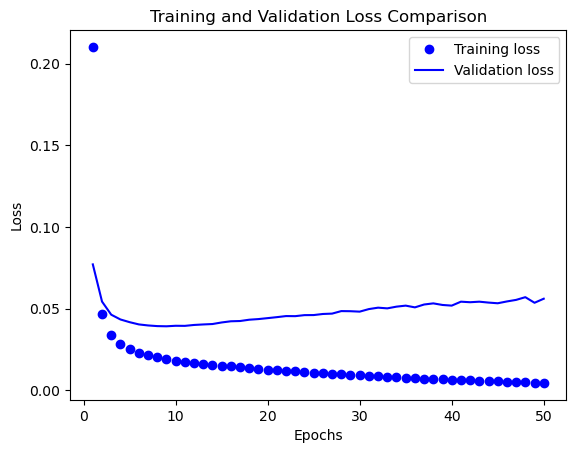

In [38]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label= "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

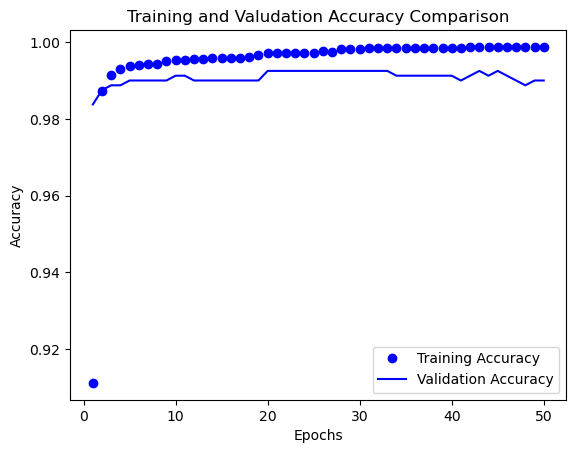

In [39]:
# lets visualize accuracy curves as well
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Valudation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model Evaluation

In [40]:
score, acc = model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9871 - loss: 0.0359


In [42]:
#compare to simple baseline model
y.value_counts(normalize = True)

Target
1.0    0.584034
0.0    0.415966
Name: proportion, dtype: float64

Much better than just guessing that 58% of the patients have no anomaly. 

#### The END!